## Árboles de regresión 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("archivos/boston.csv")
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
## dividimos el dataset en columna predictoras y la que será predicha
colnames=data.columns.tolist()
predictors=colnames[:-1]
target=colnames[-1:][0]
predictors, target

(['crim',
  'zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'black',
  'lstat'],
 'medv')

In [4]:
X=data[predictors]
Y=data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
## min samples split es para el número mínimo como para dividir un nodo y el leaf, el número mínimo
## para que un nodo sea clasificado como nodo hoja
regtree=DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)
## agregamos las variables para que tome las variables como predictora y como predicción
regtree.fit(X, Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [7]:
## crear predicciones
preds=regtree.predict(data[predictors])

In [8]:
## agregamos una columna de predicciones al dataset
data["preds"]=preds

Las predicciones se repiten por que caen dentro de la misma rama del árbol

In [9]:
## comparar la información predicha con la guardada 
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


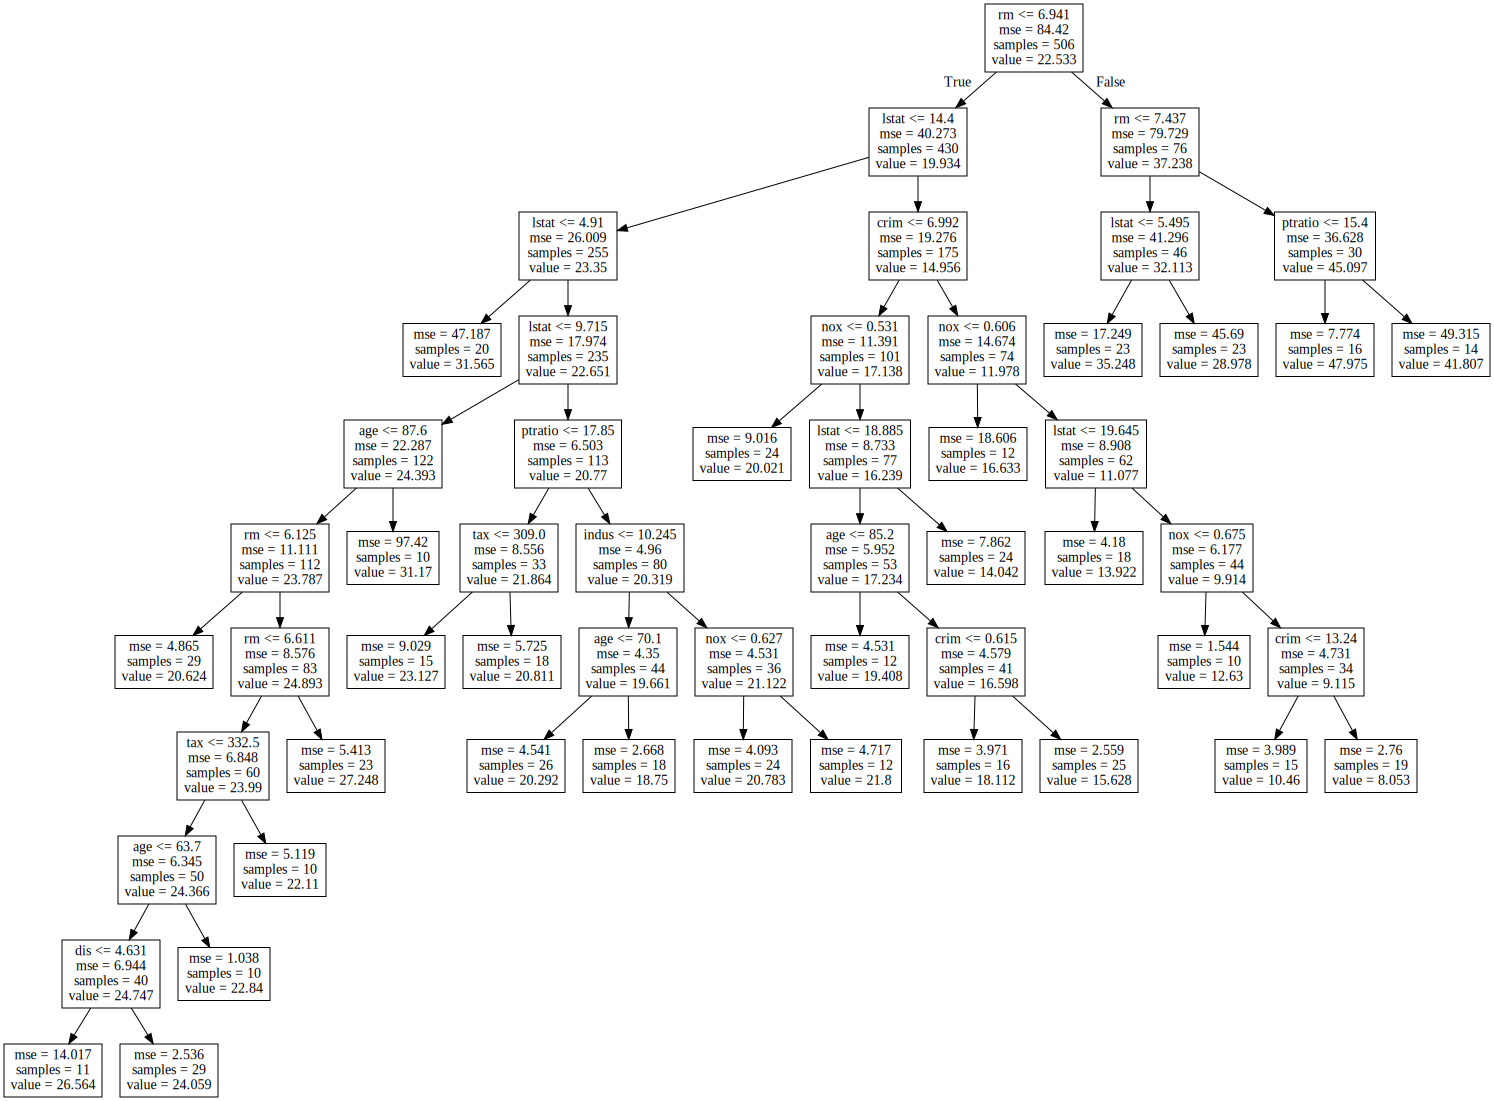

In [10]:
from sklearn.tree import export_graphviz
with open("archivos/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source
file = open("archivos/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin'

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer

In [13]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)
cv.get_n_splits(X)
scores = cross_val_score(regtree, X, Y, scoring=make_scorer(mean_squared_error), cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[13.64925886 17.28987161 16.98569707 47.56954086  9.26202865 17.23057023
 15.41541493 31.33011027 22.79877067  9.54180723]
20.107307036443846


In [14]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

## Random forests

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
#n_estimators sicnifica el número de bosques que se harán 
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10)
## hacemos los datos
forest.fit(X, Y)

c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

In [18]:
##añadimos las predicciones al dataset
data["rforest_pred"]=forest.oob_prediction_

array([26.36666667, 19.63333333, 31.625     , 33.45      , 36.25      ,
       21.6       , 19.5       , 16.82      , 17.96      , 21.76666667,
       16.03333333, 21.33333333, 18.91666667, 19.        , 21.25      ,
       19.3       , 20.94      , 17.33333333, 19.9       , 19.4       ,
       14.75      , 18.26666667, 16.93333333, 13.76      , 14.3       ,
       14.8       , 16.5       , 15.73333333, 20.5       , 30.1       ,
       13.7       , 19.7       , 17.94      , 14.2       , 14.33333333,
       22.46      , 21.775     , 22.65      , 21.8       , 27.46666667,
       34.83333333, 30.        , 24.65      , 25.8       , 20.        ,
       20.83333333, 19.4       , 19.46666667, 17.53333333, 18.64      ,
       19.83333333, 20.275     , 27.5       , 20.73333333, 18.93333333,
       34.03333333, 23.66666667, 31.175     , 23.02      , 19.55      ,
       17.76      , 18.42      , 23.7       , 26.33333333, 30.65      ,
       23.45      , 20.6       , 20.7       , 18.65      , 18.87